In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!pip install -q xlrd

In [0]:
import pandas as pd

In [4]:
!ls '/content/drive/My Drive/Covid-19 dataset/'

Test_dataset.xlsx  Train_dataset.xlsx  Variable_Description.xlsx


In [0]:
!pip install -q xlrd

In [0]:
train = pd.read_excel('/content/drive/My Drive/Covid-19 dataset/Train_dataset.xlsx')

In [7]:
train

people_ID        Region  Gender  ...   salary FT/month Infect_Prob
0              1  Bhubaneshwar  Female  ...  1300000      2.0   49.135010
1              2  Bhubaneshwar  Female  ...   400000      1.0   51.147880
2              3  Bhubaneshwar  Female  ...   900000      1.0   73.224000
3              4  Bhubaneshwar  Female  ...  2300000      1.0   48.779225
4              5  Bhubaneshwar  Female  ...  1100000      1.0   87.868800
...          ...           ...     ...  ...      ...      ...         ...
10709      22691     Bengaluru    Male  ...   300000      0.0   41.981760
10710      22692     Bengaluru    Male  ...   700000      NaN   47.148663
10711      22693     Bengaluru    Male  ...  2100000      2.0   47.708533
10712      22694     Bengaluru    Male  ...   700000      1.0   53.803565
10713      22695     Bengaluru    Male  ...  1400000      0.0   68.342400

[10714 rows x 28 columns]

In [0]:
train = pd.DataFrame(train) 

In [0]:
train.drop(["Gender","Designation","Pulmonary score","cardiological pressure","Insurance","salary","FT/month"],axis = 1,inplace = True)

In [0]:
train.drop(["Name"],axis = 1,inplace = True)

In [11]:
train

people_ID        Region  ... Blood Glucose  Infect_Prob
0              1  Bhubaneshwar  ...             7    49.135010
1              2  Bhubaneshwar  ...             6    51.147880
2              3  Bhubaneshwar  ...             6    73.224000
3              4  Bhubaneshwar  ...             7    48.779225
4              5  Bhubaneshwar  ...             7    87.868800
...          ...           ...  ...           ...          ...
10709      22691     Bengaluru  ...             7    41.981760
10710      22692     Bengaluru  ...             7    47.148663
10711      22693     Bengaluru  ...             5    47.708533
10712      22694     Bengaluru  ...             5    53.803565
10713      22695     Bengaluru  ...             3    68.342400

[10714 rows x 20 columns]

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
lb_make = LabelEncoder()
train["Region"] = lb_make.fit_transform(train["Region"])

In [14]:
train

people_ID  Region Married  ...  Charlson Index Blood Glucose Infect_Prob
0              1       1     YES  ...              27             7   49.135010
1              2       1     YES  ...               5             6   51.147880
2              3       1      NO  ...              40             6   73.224000
3              4       1     YES  ...              27             7   48.779225
4              5       1      NO  ...              32             7   87.868800
...          ...     ...     ...  ...             ...           ...         ...
10709      22691       0      NO  ...              35             7   41.981760
10710      22692       0     YES  ...              35             7   47.148663
10711      22693       0     YES  ...              16             5   47.708533
10712      22694       0     YES  ...              28             5   53.803565
10713      22695       0      NO  ...               4             3   68.342400

[10714 rows x 20 columns]

In [0]:
train['Married'] = lb_make.fit_transform(train['Married'])

In [16]:
train.head()

people_ID  Region  Married  ...  Charlson Index Blood Glucose Infect_Prob
0          1       1        1  ...              27             7   49.135010
1          2       1        1  ...               5             6   51.147880
2          3       1        0  ...              40             6   73.224000
3          4       1        1  ...              27             7   48.779225
4          5       1        0  ...              32             7   87.868800

[5 rows x 20 columns]

In [0]:
train.dropna(inplace=True)

In [0]:
train['Occupation'] = lb_make.fit_transform(train['Occupation'])

In [19]:
train.head()

people_ID  Region  Married  ...  Charlson Index  Blood Glucose Infect_Prob
0          1       1        1  ...              27              7   49.135010
2          3       1        0  ...              40              6   73.224000
3          4       1        1  ...              27              7   48.779225
4          5       1        0  ...              32              7   87.868800
5          6       1        1  ...               5              5   49.518345

[5 rows x 20 columns]

In [0]:
train['Mode_transport'] = lb_make.fit_transform(train['Mode_transport'])

In [0]:
train['comorbidity'] = lb_make.fit_transform(train['comorbidity'])

In [22]:
train.head()

people_ID  Region  Married  ...  Charlson Index  Blood Glucose  Infect_Prob
0          1       1        1  ...              27              7    49.135010
2          3       1        0  ...              40              6    73.224000
3          4       1        1  ...              27              7    48.779225
4          5       1        0  ...              32              7    87.868800
5          6       1        1  ...               5              5    49.518345

[5 rows x 20 columns]

In [0]:
train_y = train['Infect_Prob'] 

In [0]:
train_x = train.drop(["Infect_Prob"],axis = 1)

In [25]:
train_x

people_ID  Region  ...  Charlson Index  Blood Glucose
0              1       1  ...              27              7
2              3       1  ...              40              6
3              4       1  ...              27              7
4              5       1  ...              32              7
5              6       1  ...               5              5
...          ...     ...  ...             ...            ...
10709      22691       0  ...              35              7
10710      22692       0  ...              35              7
10711      22693       0  ...              16              5
10712      22694       0  ...              28              5
10713      22695       0  ...               4              3

[7832 rows x 19 columns]

In [26]:
train_y

0        49.135010
2        73.224000
3        48.779225
4        87.868800
5        49.518345
           ...    
10709    41.981760
10710    47.148663
10711    47.708533
10712    53.803565
10713    68.342400
Name: Infect_Prob, Length: 7832, dtype: float64

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
from sklearn import linear_model

In [0]:
model = linear_model.LinearRegression()

In [30]:
model.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
model.score(train_x,train_y)

0.30558062998927465

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.2)

In [0]:
predictions = model.predict(X_test)

In [0]:
y_pred = pd.DataFrame(predictions)

In [0]:
import numpy as np
from sklearn import metrics

In [37]:
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

8.415756630518331


In [38]:
model.score(X_train,y_train)

0.3147558991645556

In [39]:
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [40]:
model.score(X_train,y_train)

0.31557079847134517

In [0]:
from matplotlib import pyplot as plt

Text(0, 0.5, 'Predictions')

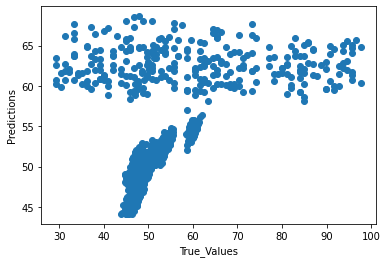

In [42]:
predictions = model.predict(X_test)
plt.scatter(y_test, predictions)
plt.xlabel("True_Values")
plt.ylabel("Predictions")

In [43]:
model.score(X_test, y_test)

0.2496508051411631

In [0]:
test = pd.read_excel('/content/drive/My Drive/Covid-19 dataset/Test_dataset.xlsx')

In [45]:
X_test.describe()

people_ID       Region  ...  Charlson Index  Blood Glucose
count   1567.000000  1567.000000  ...     1567.000000    1567.000000
mean   10028.338864     1.578813  ...       19.784301       5.056158
std     7181.668634     1.182573  ...       11.984800       1.393072
min        6.000000     0.000000  ...        0.000000       3.000000
25%     2617.500000     1.000000  ...        9.000000       4.000000
50%     9989.000000     2.000000  ...       20.000000       5.000000
75%    15114.000000     3.000000  ...       30.000000       6.000000
max    22686.000000     4.000000  ...       40.000000       7.000000

[8 rows x 19 columns]

In [46]:
X_test.head()

people_ID  Region  ...  Charlson Index  Blood Glucose
5006       9653       0  ...              26              3
2275       2276       2  ...              17              7
3032       3033       3  ...              23              6
9783      21765       0  ...              28              7
407         408       1  ...              10              5

[5 rows x 19 columns]

In [0]:
test.drop(["Gender","Designation","Pulmonary score","cardiological pressure","Insurance","salary","FT/month"],axis = 1,inplace = True)

In [48]:
test.head()

people_ID Region  ... Charlson Index Blood Glucose
0       5942  Delhi  ...             17             3
1      18664  Delhi  ...              2             5
2       5603  Delhi  ...             24             3
3       5649  Delhi  ...             13             6
4       5099  Delhi  ...             39             5

[5 rows x 20 columns]

In [0]:
test.drop(["Name"],axis = 1,inplace = True)

In [50]:
test.head()

people_ID Region Married  ...  HDL cholesterol Charlson Index Blood Glucose
0       5942  Delhi     YES  ...               53             17             3
1      18664  Delhi     YES  ...               61              2             5
2       5603  Delhi     YES  ...               47             24             3
3       5649  Delhi     YES  ...               52             13             6
4       5099  Delhi     YES  ...               68             39             5

[5 rows x 19 columns]

In [0]:
test["Region"] = lb_make.fit_transform(test["Region"])

In [0]:
test["Married"] = lb_make.fit_transform(test["Married"])

In [0]:
test["Occupation"] = lb_make.fit_transform(test["Occupation"])

In [0]:
test["Mode_transport"] = lb_make.fit_transform(test["Mode_transport"])

In [0]:
test["comorbidity"] = lb_make.fit_transform(test["comorbidity"])

In [56]:
test

people_ID  Region  ...  Charlson Index  Blood Glucose
0           5942       0  ...              17              3
1          18664       0  ...               2              5
2           5603       0  ...              24              3
3           5649       0  ...              13              6
4           5099       0  ...              39              5
...          ...     ...  ...             ...            ...
14493      23737       5  ...              34              3
14494      11171       5  ...              23              6
14495      23243       5  ...               6              6
14496      11199       5  ...              32              7
14497      10787       5  ...              15              4

[14498 rows x 19 columns]

In [0]:
result = model.predict(test)

In [0]:
result = pd.DataFrame(result)

In [60]:
result

0
0      52.834533
1      52.733716
2      52.094377
3      52.260740
4      52.249425
...          ...
14493  49.111133
14494  48.500880
14495  48.592628
14496  48.926410
14497  49.132506

[14498 rows x 1 columns]

people_ID  Region  ...  Charlson Index  Blood Glucose
0           5942       0  ...              17              3
1          18664       0  ...               2              5
2           5603       0  ...              24              3
3           5649       0  ...              13              6
4           5099       0  ...              39              5
...          ...     ...  ...             ...            ...
14493      23737       5  ...              34              3
14494      11171       5  ...              23              6
14495      23243       5  ...               6              6
14496      11199       5  ...              32              7
14497      10787       5  ...              15              4

[14498 rows x 19 columns]